# **Recommendation System: Automating Book's Suggestion using Content-based and Collaborative Filtering**

By    : Muhammad Fatih Idlan (faiti.alfaqar@gmail.com)


## Project Overview
In today’s digital age, the volume of content and choices available to users across platforms is overwhelming. Recommender systems play an indispensable role in navigating this vast landscape, ensuring users discover relevant and engaging content without being inundated by irrelevant options. By personalizing user experiences, these systems have become a cornerstone in industries like e-commerce, entertainment, and education, boosting user satisfaction, retention, and revenue. This project delves into the development of a book recommendation system, leveraging content-base filtering and collaborative filtering techniques with RecommenderNet model to match users with books they are most likely to enjoy. Content-based filtering is an approach in recommendation systems that utilizes information from items or users to make recommendations. While, collaborative filtering, a widely used approach, relies on user-item interactions to uncover patterns and provide recommendations. Unfortunately, content-based filtering techniques rely on item metadata, meaning they require detailed item descriptions and well-structured user profiles to generate accurate recommendations. Albeit that, collaborative filtering come up as a complementer which can make unforeseen recommendations, meaning it might offer items that are relevant to the user even if the information is not in the user's profile [[ 1 ]](https://doi.org/10.1016/j.eij.2015.06.005). The system implementation is aimed to demonstrate how machine learning can be harnessed to create a seamless and personalized user experience in the context of literature discovery.

## Business Understanding
### Problem Statement
Starting with explanation from the background above, core problems that this project aims to solve are:

* How to develop a machine learning-based recommendation system for books using content-based and colaborative filtering?
* How are the results between those two techniques?

### Objectives
According to problem statement above, this project has several objectives too, that are:

* Develop a machine learning-based recommendation system for books using content-based and colaborative filtering
* Determining high performance model with variation of recommendation techniques

### Solution Approach
To achive the objectives, we need to perform several things such as:

* Using content-based and colaborative filtering compare the results between those two methods

## Import Package dan Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import kagglehub
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support

## Data Loading

In [2]:
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print("Path to dataset files:", path)

100%|██████████| 24.3M/24.3M [00:00<00:00, 92.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3


In [3]:
path2book = f'{path}/Books.csv'
path2rating = f'{path}/Ratings.csv'
path2user = f'{path}/Users.csv'

Read the dataset using the pandas.read_csv function. Implement the following code.

In [4]:
books = pd.read_csv(path2book)
ratings = pd.read_csv(path2rating)
users = pd.read_csv(path2user)

<ipython-input-4-cbd60f3875b4>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(path2book)


In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
print('Amount of book data:', len(books.ISBN.unique()))
print('Total book-rated by readers:', len(ratings.ISBN.unique()))
print('Total user:', len(users['User-ID'].unique()))

Amount of book data: 271360
Total book-rated by readers: 340556
Total user: 278858


## Data Understanding

The dataset that used in this project is Book Recommendation Dataset, which can be accessed through kaggle [[ 2 ]](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data). This dataset consist of 3 csv files, Books.csv (271360 rows with 8 columns), Ratings.csv (1149780 rows with 3 columns), and Users.csv (27885 rows with 3 columns), also has 3 png file which irrelevant in this project. The explanation for each column can be seen below:

For Books.csv, the column are consist of:

* ISBN = International Standard Book Number of the books inside obtained from Amazon Web Services
* Book-Title = Title of the books obtained from Amazon Web Services
* Book-Author = The Author of the books obtained from Amazon Web Services
* Year-Of-Publication = Publication year of the books obtained from Amazon Web Services
* Publisher = The Publisher of the books obtained from Amazon Web Services
* Image-URL-S = URL for small sized Book's cover images point to the Amazon web site
* Image-URL-M = URL for medium sized Book's cover images point to the Amazon web site
* Image-URL-L = URL for large sized Book's cover images point to the Amazon web site

For Ratings.csv, the column are consist of:

* User-ID = Anonymized user identification in integers
* ISBN = International Standard Book Number of the books inside obtained from Amazon Web Services
* Book-Rating = Rating of the books, expressed on a scale from 1-10 (higher values denoting higher appreciation) in an explicit way, or expressed by 0 in implicit way

For Users.csv, the column are consist of:

* User-ID = Anonymized user identification in integers
* Location = Region of the reader in form of city, country
* Age = Age of the readers

### Univariate Exploratory Data Analysis

#### Book Variable

In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


This code reveals that the "books.csv" file contains 271,360 records and comprises 8 columns: ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, and Image-URL-L. Notably, the 'Year-Of-Publication' column is identified as having an object data type, whereas publication years are conventionally represented as integers. Hence, a correction to the data type will be carried out as an initial step.

There is an input error, so the text values will be removed before converting it to the integer data type.

In [10]:
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Removing values in 'Year-Of-Publication' that are text.

In [11]:
temp = (books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')
books = books.drop(books[temp].index)
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


Changing the data type of 'Year-Of-Publication'.

In [12]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
print(books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


The data type of the 'Year-Of-Publication' column has now been successfully converted to integer. The next step involves eliminating variables that are not relevant to the model development process. In a content-based filtering recommendation system, recommendations are generated based on books with the same title as those read by the user, while also considering the author's information. Consequently, details such as image sizes are unnecessary, allowing the removal of the 'Image-URL-S,' 'Image-URL-M,' and 'Image-URL-L' columns from the dataset.








In [13]:
# Removing Image-URL column of all sizes
books.drop(labels=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [14]:
print("Number of Book ISBN numbers:", len(books['ISBN'].unique()))
print("Number of book titles:", len(books['Book-Title'].unique()))
print('Number of book authors:', len(books['Book-Author'].unique()))
print('Number of Publication Years:', len(books['Year-Of-Publication'].unique()))
print('Number of publisher names:', len(books['Publisher'].unique()))

Number of Book ISBN numbers: 271357
Number of book titles: 242132
Number of book authors: 102021
Number of Publication Years: 116
Number of publisher names: 16805


The output reveals the counts for each variable, showing that the dataset contains 242,135 unique book titles but 271,357 ISBN. This discrepancy suggests the presence of books without ISBN, as each book is expected to have a distinct ISBN. To address this, the dataset will be filtered to retain only entries with unique ISBN.

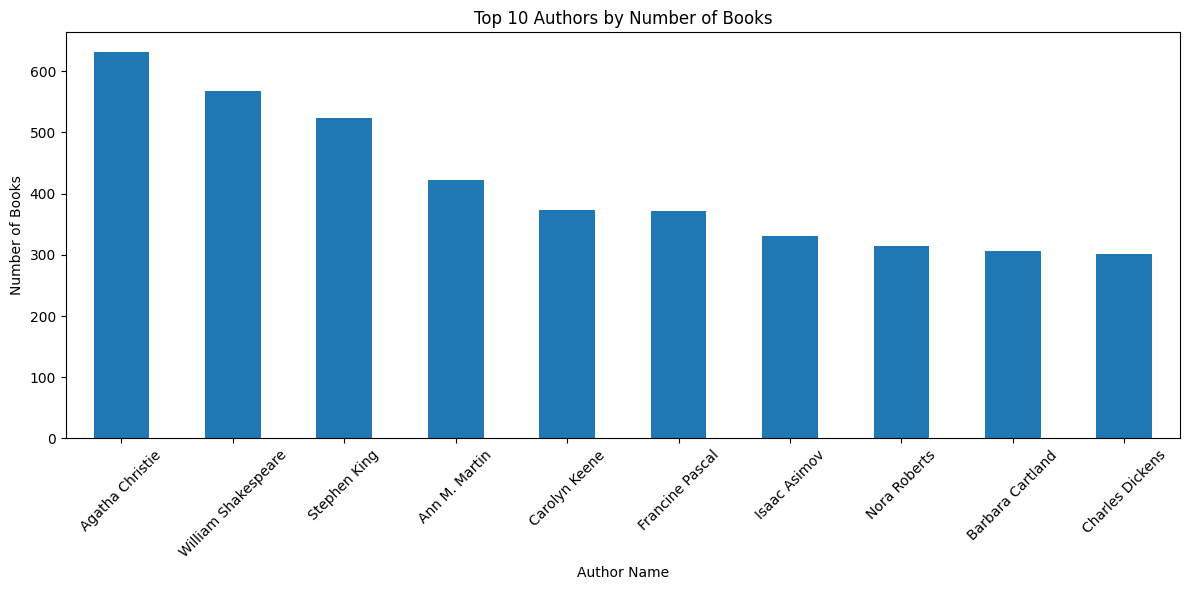

In [15]:
# Grouping Book-Author' and count the number of books written by each author
author_counts = books.groupby('Book-Author')['Book-Title'].count()

# Sort authors in descending order
sorted_authors = author_counts.sort_values(ascending=False)

# Select the top 10 authors
top_10_authors = sorted_authors.head(10)

# The plot of the top 10 authors and the books written by the authors, then calculated using a bar plot
plt.figure(figsize=(12, 6))
top_10_authors.plot(kind='bar')
plt.xlabel('Author Name')
plt.ylabel('Number of Books')
plt.title('Top 10 Authors by Number of Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The data indicates that Agatha Christie is the most prolific author, with over 600 books to her name. This also highlights that the dataset includes multiple authors who have contributed more than one book title.

#### Ratings Variable

In [16]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


The output shows a total of 1,149,780 records across three columns: User-ID, representing the unique identifier for each anonymous user who provided ratings; ISBN, the unique identifier for each book; and Book-Rating, indicating the score assigned to the book by a user. To view the entry counts for each variable, execute the following code.

In [18]:
print('Number of User-IDs:', len(ratings['User-ID'].unique()))
print('Number of books based on ISBN:', len(ratings['ISBN'].unique()))

print('Number of book ratings:')
sorted_ratings = ratings['Book-Rating'].value_counts().sort_index()
pd.DataFrame({'Book-Rating': sorted_ratings.index, 'Sum': sorted_ratings.values})

Number of User-IDs: 105283
Number of books based on ISBN: 340556
Number of book ratings:


,Book-Rating,Sum
0,0,716109
1,1,1770
2,2,2759
3,3,5996
4,4,8904
5,5,50974
6,6,36924
7,7,76457
8,8,103736
9,9,67541


The output reveals that 105,283 users have provided ratings for books. A total of 340,556 unique books, identified by their ISBNs, received ratings, which range from 0 (the lowest score) to 10 (the highest score).

The "ratings" dataset contains a total of 1,149,780 rows, representing a significant volume of data. Since this dataset will be utilized for collaborative filtering in model development, only a subset will be selected to optimize memory usage during training. Specifically, the first 5,000 entries (excluding entry 5000) will be extracted for this purpose. This subset will serve as the basis for building a collaborative filtering model, which relies on user rating data to generate book title recommendations for other users. To streamline the process and minimize confusion with similar features, the dataset is renamed to "df_rating."

In [19]:
df_rating = ratings[:20000]
df_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
19995,3757,843222264X,7
19996,3757,8432222658,7
19997,3757,8432222666,7
19998,3757,8432222674,7


#### Users Variable

In [20]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


The dataset contains 278,858 records and includes three variables: User-ID, a unique identifier for anonymous users; Location, representing the users' geographical information; and Age, indicating the users' age. It is observed that some users have missing age information. While user data can be valuable for developing recommendation systems based on demographic or social factors, this study will not incorporate user data into the model. Instead, the focus will be on utilizing the "books" and "ratings" datasets for model development.




## Data Preprocessing

### Merging DataFrame and Determining the Total Number of Ratings

In [22]:
# Merging dataframe ratings with books based on ISBN values
books = pd.merge(ratings, books, on='ISBN', how='left')
books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic


In [23]:
books.groupby('ISBN').sum()

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
ISBN,,,,,,
0330299891,271009,6,0,0,0.0,0
0375404120,356057,3,0,0,0.0,0
0586045007,89192,0,0,0,0.0,0
9022906116,100868,7,0,0,0.0,0
9032803328,89192,0,0,0,0.0,0
...,...,...,...,...,...,...
cn113107,107301,0,0,0,0.0,0
ooo7156103,266146,7,0,0,0.0,0
§423350229,85250,0,0,0,0.0,0


## Data Preparation for Model Development with Content-based Filtering

### Handling Missing Value

In [24]:
# Checking missing value using isnull() function
books.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,118648
Book-Author,118650
Year-Of-Publication,118648
Publisher,118650


Several features in the dataset contain a significant number of missing values. However, the User-ID, ISBN, and Book-Rating features have no missing entries. The feature with the highest count of missing values is 'Publisher,' with 118,650 missing entries. Considering the dataset's total size of 1,149,780 records, this represents a relatively small and manageable proportion. As a result, the missing values will be removed, and a cleaned version of the dataset will be created under the name 'all_books_clean.'

In [25]:
all_books_clean = books.dropna()
all_books_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books


In [26]:
all_books_clean.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


### Standardizing Book Types Based on ISBN

In [27]:
fix_books = all_books_clean.sort_values('ISBN', ascending=True)
fix_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
357256,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
103677,23902,0001046438,9,Liar,Stephen Fry,0.0,Harpercollins Uk
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0.0,Digireads.com


In [28]:
len(fix_books['ISBN'].unique())

270144

In [29]:
len(fix_books['Book-Title'].unique())

241065

The information provided reveals a mismatch between the number of ISBNs and book titles, suggesting that certain ISBNs are linked to multiple titles. To address this and prepare the dataset for modeling, it is essential to ensure data uniqueness. This will involve eliminating duplicate entries in the 'ISBN' column. The cleaned dataset will then be stored in a new variable named 'preparation.' You can use the following code to execute this process.

In [30]:
preparation = fix_books.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
357256,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
103677,23902,0001046438,9,Liar,Stephen Fry,0.0,Harpercollins Uk
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
103678,23902,000104687X,6,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0.0,Digireads.com


In [31]:
# convert the 'ISBN' data series into list form
isbn_id = preparation['ISBN'].tolist()

# convert the 'Book-Title' data series into list form
book_title = preparation['Book-Title'].tolist()

# convert the 'Book-Author' data series into list form
book_author = preparation['Book-Author'].tolist()

# convert the 'Year-Of-Publication' data series into list form
year_of_publication = preparation['Year-Of-Publication'].tolist()

# convert the 'Publisher' data series into list form
publisher = preparation['Publisher'].tolist()

print(len(isbn_id))
print(len(book_title))
print(len(book_author))
print(len(year_of_publication))
print(len(publisher))

270144
270144
270144
270144
270144


From the output provided, it is clear that the dataset has been refined, ensuring that the number of entries for ISBN, book title, author, year of publication, and publisher are now consistent and unique. Following the removal of duplicate entries, the dataset now consists of 270,144 rows. The subsequent task is to construct a dictionary that defines key-value pairs for the isbn_id, book_title, book_author, year_of_publication, and publisher fields. This prepared data will serve as the foundation for developing the content-based filtering recommendation system.

In [32]:
books_new = pd.DataFrame({
    'isbn': isbn_id,
    'book_title': book_title,
    'book_author': book_author,
    'year_of_publication': year_of_publication,
    'publisher': publisher

})

books_new

,isbn,book_title,book_author,year_of_publication,publisher
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
1,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins
2,0001046438,Liar,Stephen Fry,0.0,Harpercollins Uk
3,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...
270139,B000234N76,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
270140,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
270141,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
270142,B0002JV9PY,The Blockade Runners,Jules Verne,0.0,Digireads.com


In [33]:
books_new = books_new[:20000]

In [34]:
books_new

,isbn,book_title,book_author,year_of_publication,publisher
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
1,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins
2,0001046438,Liar,Stephen Fry,0.0,Harpercollins Uk
3,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...
19995,0140444696,The Kreutzer Sonata and Other Stories (Penguin...,Leo Tolstoy,1986.0,Penguin Books
19996,014044470X,The Fiancee and Other Stories (Penguin Classics),Anton Pavlovich Chekhov,1986.0,Penguin Books
19997,0140444726,Jacques the Fatalist and His Master (Penguin C...,Denis Diderot,1986.0,Penguin Books
19998,0140444742,Seven Viking Romances (Penguin Classics),Hermann Palsson,1986.0,Penguin Books


## Data Preparation for Model Development with Collaborative Filtering

For the collaborative filtering model, the dataset will be divided into training and validation sets during the training process. Prior to splitting, the data must undergo preparation. This involves transforming the rating data into a numerical matrix to streamline the model's ability to interpret and learn from it effectively. As part of this stage, several preprocessing steps will be applied: encoding the 'User-ID' and 'ISBN' features into integer indices, mapping 'User-ID' and 'ISBN' to their respective dataframes, and verifying critical data attributes such as the total number of users and books. Additionally, the rating values will be converted to float format to ensure compatibility during the model training phase.

In [35]:
# convert User-ID to a list without matching values
user_ids = df_rating['User-ID'].unique().tolist()
print('list userIDs: ', user_ids)

# perform User-ID encoding
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID: ', user_to_user_encoded)

# carry out the process of encoding numbers into User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded number to userID: ', user_encoded_to_user)

list userIDs:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 

In [36]:
# convert ISBNs to a list without matching values
isbn_id = df_rating['ISBN'].unique().tolist()

# perform ISBN encoding
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_id)}

# carry out the process of encoding numbers to ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_id)}

In [37]:
# Disable the SettingWithCopyWarning warning
pd.options.mode.chained_assignment = None # "warn" or "raise" to turn it back on

# Mapping User-ID to user dataframe
df_rating['user'] = df_rating['User-ID'].map(user_to_user_encoded)

# Mapping ISBN to book title dataframe
df_rating['book_title'] = df_rating['ISBN'].map(isbn_to_isbn_encoded)

In [38]:
# get the number of users
num_users = len(user_to_user_encoded)
print(num_users)

# get the number of book titles
num_book_title = len(isbn_to_isbn_encoded)
print(num_book_title)

# convert the rating to a float value
df_rating['Book-Rating'] = df_rating['Book-Rating'].values.astype(np.float32)

# minimum rating value
min_rating = min(df_rating['Book-Rating'])

# maximum rating value
max_rating = max(df_rating['Book-Rating'])

print('Number of Users: {}, Number of Books: {}, Min Rating: {}, Max Rating: {}'.format(
     num_users, num_book_title, min_rating, max_rating
))

2180
17178
Number of Users: 2180, Number of Books: 17178, Min Rating: 0.0, Max Rating: 10.0


## Model Development with Content-based Filtering

The model uses Content-Based Filtering to recommend items based on user preferences and item features. TF-IDF Vectorizer identifies key features of book titles, focusing on authors, while cosine similarity measures how closely books are related. Sklearn's tfidfvectorizer() and cosine_similarity() functions are applied to implement these steps.

In [39]:
data = books_new
data.sample(5)

,isbn,book_title,book_author,year_of_publication,publisher
2671,0030155665,Chanukah,Howard Greenfeld,1976.0,Henry Holt &amp; Co (J)
66,0001981307,The Cross Rabbit (Percy's Park),Nick Butterworth,1994.0,HarperCollins Publishers
19195,0140377700,The Paw Thing,Paul Jennings,1996.0,Puffin
1197,0007160003,Transforming the Mind: Teachings on Generating...,Bstan-Dzin-Rgya-Mtsho,2003.0,Thorsons Publishers
9944,0061082996,Golden Dream,Carol Jerina,1994.0,HarperPrism


### TF-IDF Vectorizer

In [40]:
# Initialize TfidfVectorizer
TF = TfidfVectorizer()

# Perform IDF calculations on book_author data
TF.fit(data['book_author'])

# Mapping array from integer index features to name features
TF.get_feature_names_out()

array(['1988', 'aaron', 'aarons', ..., 'zweifel', 'zwinger', 'â¼nter'],
      dtype=object)

In [41]:
# Performs a fit and then transforms it into matrix form
tfidf_matrix = TF.fit_transform(data['book_author'])

# View the tfidf matrix size
tfidf_matrix.shape

(20000, 8746)

In [42]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=TF.get_feature_names_out(),
    index=data.book_title
).sample(15, axis=1).sample(10, axis=0)

,jamling,detection,kate,eason,munro,anna,yapalater,copeland,storer,hannity,norton,heneman,grossmith,mordicai,reiner
book_title,,,,,,,,,,,,,,,
"The Least You Should Know About English: Writing Skills, Form A",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
American government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thank You for the Music : Stories,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
My Antonia (Twentieth-Century Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Facts and Fictions of Minna Pratt (MacLachlan Repackages),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Escape from Five Shadows,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Paloverde,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jacob Have I Loved,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Maggie Cassidy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The TF-IDF matrix successfully captures key feature representations for each book title using the tfidfvectorizer function. Since only a sample dataset is displayed, the full matrix is not shown. From 20,000 entries, a random selection of 10 book titles (vertical axis) and 15 author names (horizontal axis) is presented.

### Cosine Similarity

In [44]:
# Calculating cosine similarity on the tf-idf matrix
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

At this stage, cosine similarity is calculated for the tfidf_matrix dataframe generated earlier. By utilizing the cosine_similarity function from the sklearn library, similarity scores between book titles are derived. The code outputs a similarity matrix in an array format.

In [45]:
# Create a dataframe from the cosine_sim variable with rows and columns in the form of book titles
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
print('Shape:', cosine_sim_df.shape)

# View the similarity matrix for each book title
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (20000, 20000)


book_title,Energize Your Life,"The Slippery Slope (A Series of Unfortunate Events, Book 10)",The Missing 'Gator of Gumbo Limbo (Eco Mystery),Spring Torrents (Penguin Classics),1939
book_title,,,,,
"Spinout (Nascar, No 6)",0.0,0.0,0.0,0.0,0.0
The Phantom of the Opera: Pop-Up Book,0.0,0.0,0.0,0.0,0.0
Wall games,0.0,0.0,0.0,0.0,0.0
Recovering from a Cesarean Section,0.0,0.0,0.0,0.0,0.0
Riceyman Steps (Twentieth Century Classics S.),0.0,0.0,0.0,0.0,0.0
How Town (Harper Novel of Suspense),0.0,0.0,0.0,0.0,0.0
Michael Field's Cooking School: A Selection of Great Recipes Demonstrating the Pleasures and Principles of Fine Cooking,0.0,0.0,0.0,0.0,0.0
Blue Wolf (Julie Andrews Collection),0.0,0.0,0.0,0.0,0.0
Eleventh Commandment,0.0,0.0,0.0,0.0,0.0


Cosine similarity successfully identifies relationships between book titles, producing a 20,000 x 20,000 similarity matrix. This indicates the system has analyzed similarity levels for 20,000 titles. For clarity, only a subset—10 titles on the vertical axis and 5 on the horizontal—is shown. Using this similarity data, the system can recommend books similar to those a user has read or purchased.








### Getting Recommendations

In [102]:
def book_recommendation(book_title, similarity_data=cosine_sim_df, items=data[['book_title', 'book_author']], k=10):
     # Retrieve data by using argpartition to partition indirectly along a given axis
     # Dataframe converted to numpy
     # Range(start, stop, step)
     index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))

     # Retrieve data with the greatest similarity from the existing index
     closest = similarity_data.columns[index[-1:-(k+2):-1]]

     # Drop book_title so that the name of the book you are looking for does not appear in the recommendation list
     closest = closest.drop(book_title, errors='ignore')

     return pd.DataFrame(closest).merge(items).head(k)

In [103]:
book_title_test = "Joyful Noise (rpkg) : Poems for Two Voices" # book title example

data[data.book_title.eq(book_title_test)]

,isbn,book_title,book_author,year_of_publication,publisher
11886,0064460932,Joyful Noise (rpkg) : Poems for Two Voices,Paul Fleischman,1992.0,HarperTrophy


In [105]:
# Get recommendations for similar book titles
book_recommendation(book_title_test)

,book_title,book_author
0,Graven Images: Three Stories,Paul Fleischman
1,The Path of the Pale Horse (Charlotte Zolotow ...,Paul Fleischman
2,Seedfolks,Paul Fleischman
3,Seedfolks,Paul Fleischman
4,The Borning Room,Paul Fleischman
5,The Borning Room,Paul Fleischman
6,The Half-a-Moon Inn,Paul Fleischman
7,Seedfolks,Paul Fleischman
8,Seedfolks,Paul Fleischman
9,The Borning Room,Paul Fleischman


The system successfully recommends the top 5 book titles under the author category "Thomas Merton".

## Model Development with Collaborative Filtering

This project applies collaborative filtering to recommend books based on user ratings, assuming similar preferences predict similar choices. The model uses embeddings for users and books, calculates match scores with a sigmoid function, and incorporates user/book biases. Adapted from a Keras tutorial [[ 3 ]](https://keras.io/examples/structured_data/collaborative_filtering_movielens/), it uses Binary Crossentropy for loss, Adam for optimization, and RMSE for evaluation.

### Splitting Data for Training and Validation

In [49]:
df_rating = df_rating.sample(frac=1, random_state=37)
df_rating

,User-ID,ISBN,Book-Rating,user,book_title
7088,278418,0590367943,0.0,678,6686
13546,1797,0340588721,9.0,1468,12143
19859,3757,8424139070,8.0,2179,17041
14843,2253,0451207580,0.0,1634,13186
7839,278418,0688141692,0.0,678,7404
...,...,...,...,...,...
11898,901,0571200389,0.0,1153,2238
4118,278227,0446604666,0.0,607,3858
988,277168,0812516001,0.0,162,974
9036,278543,0679434488,10.0,734,8546


The data is split into 90% training and 10% validation. Before this, user and book title data are mapped to single values, and ratings are scaled to a 0-1 range for easier training.

In [50]:
# create a variable x to match user data and book title into one value
x = df_rating[['user', 'book_title']].values

# create a y variable to create a rating of the results
y = df_rating['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# divide into 90% train data and 10% validation data

train_indices = int(0.9 * df_rating.shape[0])
x_train, x_val, y_train, y_val = (
     x[:train_indices],
     x[train_indices:],
     y[:train_indices],
     y[train_indices:]
)

print(x, y)

[[  678  6686]
 [ 1468 12143]
 [ 2179 17041]
 ...
 [  162   974]
 [  734  8546]
 [  255  1881]] [0.  0.9 0.8 ... 0.  1.  0.7]


### Training Process

During training, the model calculates match scores between users and book titles using embeddings. User and book embeddings are multiplied via dot product, with optional bias added. Scores are scaled to [0, 1] using a sigmoid activation function. The RecommenderNet class, built using the Keras Model class and adapted from a Keras tutorial, is used for this process.

In [51]:
class RecommenderNet(tf.keras.Model):

     # function initialization
     def __init__(self, num_users, num_book_title, embedding_size, dropout_rate=0.2, **kwargs):
         super(RecommenderNet, self).__init__(**kwargs)
         self.num_users = num_users
         self.num_book_title = num_book_title
         self. embedding_size = embedding_size
         self.dropout_rate = dropout_rate

         self.user_embedding = layers.Embedding( # user embedding layer
             num_users,
             embedding_size,
             embeddings_initializer = 'he_normal',
             embeddings_regularizer =keras.regularizers.l2(1e-6)
         )
         self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias

         self.book_title_embedding = layers.Embedding( # book_title embedding layer
             num_book_title,
             embedding_size,
             embeddings_initializer = 'he_normal',
             embeddings_regularizer =keras.regularizers.l2(1e-6)
         )
         self.book_title_bias = layers.Embedding(num_book_title, 1) # layer embedding book_title

         self.dropout = layers.Dropout(rate=dropout_rate)

     def call(self, inputs):
         user_vector = self.user_embedding(inputs[:, 0]) # call embedding layer 1
         user_vector = self.dropout(user_vector)
         user_bias = self.user_bias(inputs[:, 0]) # call embedding layer 2

         book_title_vector = self.book_title_embedding(inputs[:, 1]) # call embedding layer 3
         book_title_vector = self.dropout(book_title_vector)
         book_title_bias = self.book_title_bias(inputs[:, 1]) # call embedding layer 4

         dot_user_book_title = tf.tensordot(user_vector, book_title_vector, 2) # dot product multiplication

         x = dot_user_book_title + user_bias + book_title_bias

         return tf.nn.sigmoid(x) # activate sigmoid

In [52]:
model = RecommenderNet(num_users, num_book_title, 50) # initialize model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=1e-4),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [53]:
# start the training process

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 50,
    validation_data = (x_val, y_val),
)

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 0.6902 - root_mean_squared_error: 0.4396 - val_loss: 0.6723 - val_root_mean_squared_error: 0.4258
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.6562 - root_mean_squared_error: 0.4197 - val_loss: 0.6509 - val_root_mean_squared_error: 0.4132
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.6164 - root_mean_squared_error: 0.3968 - val_loss: 0.6332 - val_root_mean_squared_error: 0.4028
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.5778 - root_mean_squared_error: 0.3721 - val_loss: 0.6190 - val_root_mean_squared_error: 0.3946
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.5464 - root_mean_squared_error: 0.3571 - val_loss: 0.6076 - val_root_mean_squared_error: 0.3881
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 0.5387 - root_mean_squared_error: 0.3542 - val_loss: 0.5974 - val_root_mean_squared_error: 0.3825
Epoch 7/50
1125/1125 ━━━━━━━

Based on the results of the model training process, satisfactory results are obtained, and the model converges at around 50 epochs. From this process, a Root Mean Squared Error (RMSE) value of approximately 0.2924 and an RMSE on the validation data of 0.3389 are obtained. These values are quite good for a recommendation system. To see the results of the model development, the next step is to get book title recommendations based on the developed model.

### Getting Book Title Recommendations

To obtain book title recommendations, first, a random sample of users is taken, and the variable book_not_read is defined, which is a list of books that the user has never read or purchased. This variable book_not_read will be the book titles recommended by the system.

The book_not_visited variable is obtained by using the bitwise NOT operator (~) on the book_read_by_user variable.

In [79]:
book_df = books_new

# take a sample of users
user_id = df_rating['User-ID'].sample(1).iloc[0]
book_readed_by_user = df_rating[df_rating['User-ID'] == user_id]

# create variable book_not_readed
book_not_readed = book_df[~book_df['isbn'].isin(book_readed_by_user['ISBN'].values)]['isbn']
book_not_readed = list(
    set(book_not_readed).intersection(set(isbn_to_isbn_encoded.keys()))
)

book_not_readed = [[isbn_to_isbn_encoded.get(x)] for x in book_not_readed]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_readed), book_not_readed)
)

In [101]:
ratings_model = model.predict(user_book_array).flatten()

top_ratings_indices = ratings_model.argsort()[-10:][::-1]

recommended_book_ids = [
    isbn_encoded_to_isbn.get(book_not_readed[x][0]) for x in top_ratings_indices
]

top_book_user = (
    book_readed_by_user.sort_values(
        by='Book-Rating',
        ascending=False
    )
    .head(10)['ISBN'].values
)

book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]

# Displays book recommendations in DataFrame form
book_df_rows_data = []
for row in book_df_rows.itertuples():
    book_df_rows_data.append([row.book_title, row.book_author])

recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)]

recommended_book_data = []
for row in recommended_book.itertuples():
    recommended_book_data.append([row.book_title, row.book_author])

# Create a DataFrame for output
output_columns = ['Book Title', 'Book Author']
df_book_readed_by_user = pd.DataFrame(book_df_rows_data, columns=output_columns)
df_recommended_books = pd.DataFrame(recommended_book_data, columns=output_columns)

# Displays recommendation results in DataFrame form
print("Showing recommendation for users: {}".format(user_id))
print("===" * 9)
print("Book with high ratings from user")
print("----" * 8)
print(df_book_readed_by_user)
print("----" * 8)
print("Top 10 books recommendation")
print("----" * 8)
df_recommended_books

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Showing recommendation for users: 3363
Book with high ratings from user
--------------------------------
                                   Book Title      Book Author
0  Joyful Noise (rpkg) : Poems for Two Voices  Paul Fleischman
--------------------------------
Top 10 books recommendation
--------------------------------


,Book Title,Book Author
0,The Complete Idiot's Guide to Cycling,Vic Armijo
1,A Kiss on the Nose Turns Anger Aside,Charles M. Schulz
2,The Dominant Blonde,Alisa Kwitney
3,The Last Report on the Miracles at Little No H...,Louise Erdrich
4,Ties That Bind,Phillip Margolin
5,Inventing the Abbotts and Other Stories (Harpe...,Sue Miller
6,"Kingmaker's Sword (The Rune Blade Trilogy, Boo...",Ann Marston
7,Legend,Sharon Sala
8,For My Daughters,Barbara Delinsky
9,Memoirs of a Geisha Uk,Arthur Golden


Recommendations have been successfully generated for user ID 3363. The output compares "Books highly rated by the user" with the "Top 10 recommended books." Notably, some suggested titles include authors matching the user's preferences, with one book also being the user's highest-rated.

## Model Evaluation with Content-based Filtering

The model's performance is evaluated using Precision, Recall, and F1-Score. Precision measures relevant recommendations, Recall assesses identified relevant items, and F1-Score balances both. Ground truth labels, created from cosine similarity (1 for similar, 0 for not), are used for evaluation, with a threshold determining similarity.








In [56]:
# Determines the threshold for categorizing similarity as 1 or 0
threshold = 0.5

# Create ground truth data with threshold assumptions
ground_truth = np.where(cosine_sim >= threshold, 1, 0)

# Displays several values in the ground truth matrix
ground_truth_df = pd.DataFrame(ground_truth, index=data['book_title'], columns=data['book_title']).sample(5, axis=1).sample(10, axis=0)

The code sets a threshold of 0.5, adjustable based on the recommendation results. A ground truth matrix is generated using NumPy's np.where() function, assigning 1 where cosine similarity meets or exceeds the threshold and 0 otherwise. The resulting matrix is presented as a dataframe, indexed by book titles.

In [57]:
ground_truth_df

book_title,Rachels's Way,Mountbatten the Official Biography,Black Odyssey: The Case of the Slave Ship Amistad,The FACE IN THE ABYSS (Collier Nucleus Science Fiction Classic),Freewill
book_title,,,,,
Taking Charge of Your Fertility: The Definitive Guide to Natural Birth Control and Pregnancy Achievement,0,0,0,0,0
Tom Foolery,0,0,0,0,0
Smoke Screen (Antiquarian Book Mysteries),0,0,0,0,0
The I.R.A (Fontana paperbacks),0,0,0,0,0
Mr. Darwin's Shooter,0,0,0,0,0
My Phantom Love (A Changes Romance),0,0,0,0,0
Fantasia of the Unconscious and Psychoanalysis and the Unconscious (Penguin Twentieth Century Classics),0,0,0,0,0
mental_floss Presents Condensed Knowledge: A Deliciously Irreverent Guide to Feeling Smart Again,0,0,0,0,0
Power of Three,0,0,0,0,0


After creating the ground truth matrix, model evaluation is done using precision, recall, and F1 scores. The precision_recall_fscore_support function from Sklearn calculates these metrics. To speed up the process, only 10,000 samples are used, and the matrices are flattened into one-dimensional arrays. Cosine similarity values are categorized as 1 or 0 based on a threshold, and the results are stored in the predictions array. Precision, recall, and F1 scores are then computed with binary classification and zero division handling.

In [58]:
# Takes a small portion of the cosine similarity matrix and ground truth matrix
sample_size = 10000
cosine_sim_sample = cosine_sim[:sample_size, :sample_size]
ground_truth_sample = ground_truth[:sample_size, :sample_size]

# Converts the cosine similarity matrix to a one-dimensional array for comparison
cosine_sim_flat = cosine_sim_sample.flatten()

# Converts the ground truth matrix into a one-dimensional array
ground_truth_flat = ground_truth_sample.flatten()

# Calculate evaluation metrics
predictions = (cosine_sim_flat >= threshold).astype(int)
precision, recall, f1, _ = precision_recall_fscore_support(
     ground_truth_flat, predictions, average='binary', zero_division=1
)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0


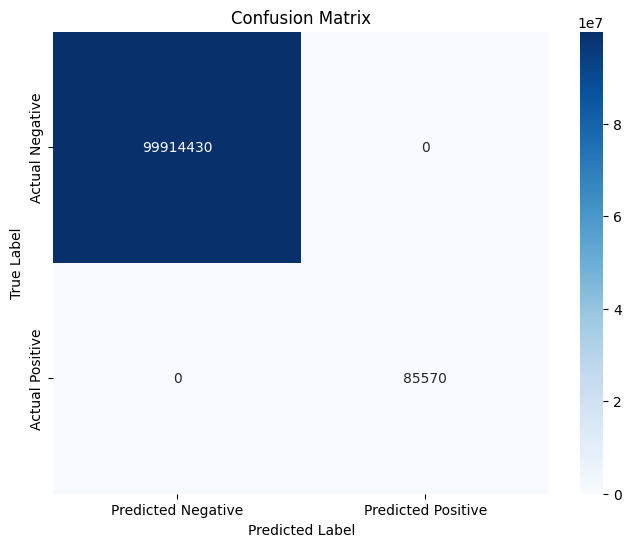

In [59]:
# prompt: plot confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'ground_truth_flat' and 'predictions' are defined as in the provided code
# Example:
# ground_truth_flat = np.array([0, 1, 1, 0, 1])
# predictions = np.array([1, 1, 0, 0, 1])


cm = confusion_matrix(ground_truth_flat, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The evaluation results show that the model performs excellently, with a Precision of 1.0 (no false positives), a Recall of 1.0 (identifying nearly all relevant items), and an F1 Score close to 1.0, indicating a strong balance between precision and recall. These results demonstrate that the model is highly effective at recommending items using content-based filtering.

## Model Evaluation with Collaborative Filtering

In the Collaborative Filtering model, RMSE (Root Mean Squared Error) is used to evaluate how accurately the model predicts continuous values by comparing predicted and actual values. RMSE helps assess the model's ability to predict user preferences. The training results, including RMSE for both training and validation data, are plotted for visualization using matplotlib.

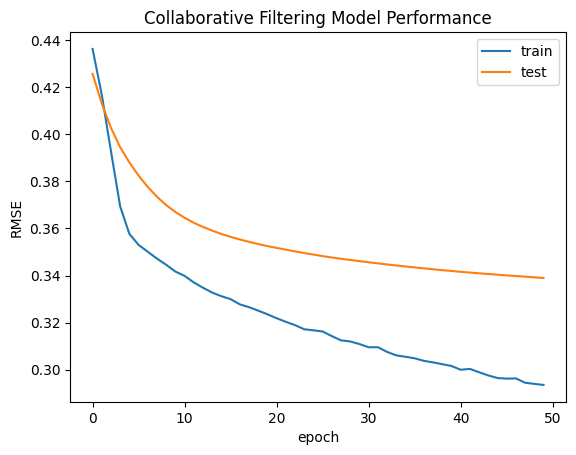

In [61]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Collaborative Filtering Model Performance')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

The RMSE evaluation visualization shows that the model converges after about 50 epochs, achieving a low MSE value. The final error is 0.2924, with a validation error of 0.3389. These results indicate good performance, as a lower RMSE means better predictions of user preferences, making the recommendation system accurate.